STAT 479: Machine Learning (Fall 2018)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat479-fs2018/

# L09: Model Evaluation 2 -- Confidence Intervals and Bootstrapping

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,mlxtend,matplotlib,sklearn

Sebastian Raschka 
last updated: 2018-10-24 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.1
mlxtend 0.14.0dev
matplotlib 2.2.3
sklearn 0.20.0


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Iris Feature by Class Distribution in Random Subsampling

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = iris_data()

X, y = shuffle_arrays_unison([X, y], random_seed=123)
X_train, X_test = X[:100], X[100:150]
y_train, y_test = y[:100], y[100:150]

In [4]:
np.bincount(y)

array([50, 50, 50])

In [5]:
np.bincount(y_train)

array([38, 28, 34])

In [6]:
np.bincount(y_test)

array([12, 22, 16])

In [7]:
df = pd.DataFrame(X)
df['class'] = y

df_train = pd.DataFrame(X_train)
df_train['class'] = y_train

df_test = pd.DataFrame(X_test)
df_test['class'] = y_test

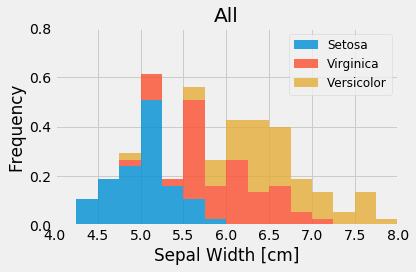

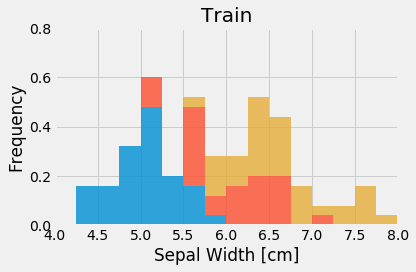

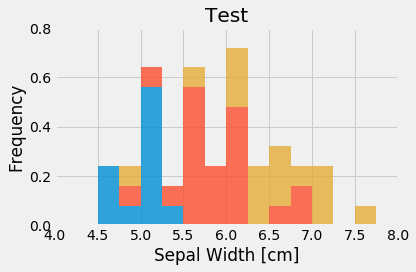

In [8]:
def stackhist(x, y, **kws):
    grouped = x.groupby(y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data, 
             histtype="barstacked", 
             label=labels, 
             alpha=0.8, 
             density=True,
             bins=np.arange(4.0, 8.1, 0.25))
    plt.ylim([0, 0.8])
    plt.xlim([4, 8])
    plt.xlabel('Sepal Width [cm]')
    plt.ylabel('Frequency')
    

with plt.style.context('fivethirtyeight'):    

    stackhist(df[0], df['class'])
    plt.legend(['Setosa', 'Virginica', 'Versicolor'], fontsize=12)
    plt.title('All')
    plt.tight_layout()
    #plt.savefig('./all.svg')
    plt.show()    

    stackhist(df_train[0], df_train['class'])
    plt.title('Train')
    plt.tight_layout()
    #plt.savefig('./train.svg')
    plt.show()    

    stackhist(df_test[0], df_test['class'])
    plt.title('Test')
    plt.tight_layout()
    #plt.savefig('./test.svg')
    plt.show() 
    

# Holdout method and repeated sampling

In [9]:
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = iris_data()

clf_1 = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform', 
                             algorithm='kd_tree', 
                             leaf_size=30, 
                             p=2, 
                             metric='minkowski', 
                             metric_params=None, 
                             n_jobs=1)

Average: 95.41%


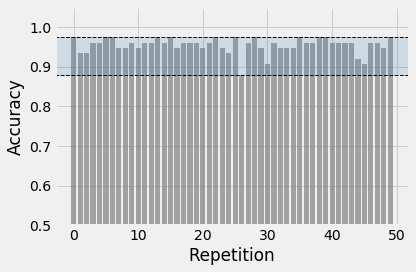

In [10]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.5, 
                                                        random_state=i,
                                                        stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.05])
    plt.tight_layout()
    #plt.savefig('figures/model-eval-iris_0.svg')
    plt.show()

Average: 96.13%


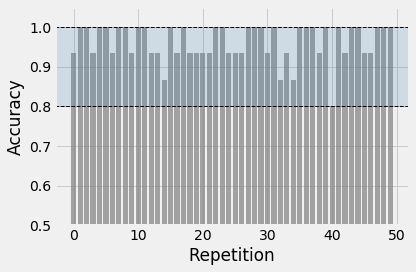

In [11]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.1, 
                                                        random_state=i,
                                                        stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)
    
pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.05)
    plt.tight_layout()
    #plt.savefig('figures/model-eval-iris_0_2.svg')
    plt.show()

## Pessimistic Bias in Holdout

In [12]:
from mlxtend.data import mnist_data

X2, y2 = mnist_data()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                        test_size=0.3, 
                                                        random_state=12,
                                                        stratify=y2)
print('Number of train examples:', y_train2.shape[0])
print('Number of test examples:', y_test2.shape[0])
print('Labels:', y_train2)

Number of train examples: 3500
Number of test examples: 1500
Labels: [8 8 7 ... 6 9 8]


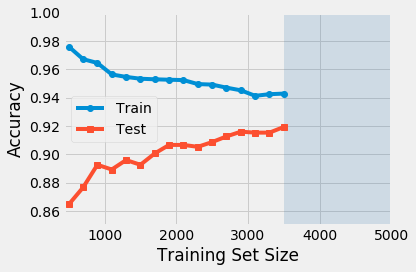

In [13]:
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=0.000001, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=12, 
                           solver='lbfgs', 
                           max_iter=1000, 
                           multi_class='multinomial', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=1)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)
    
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    #plt.savefig('figures/model-eval-mnist_0.svg')

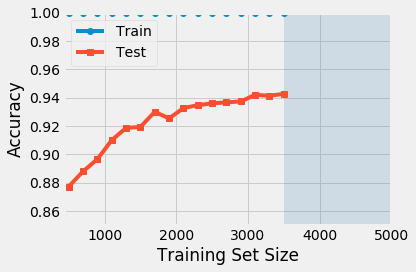

In [14]:
from sklearn.ensemble import RandomForestClassifier


clf_2 = RandomForestClassifier(n_estimators=100, random_state=123)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)
    
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    #plt.savefig('figures/model-eval-mnist_0.svg')

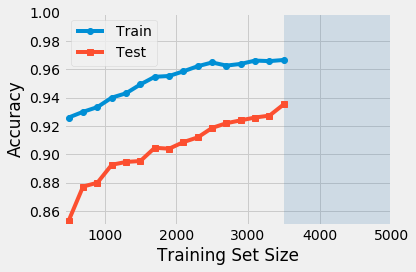

In [15]:
from sklearn.neighbors import KNeighborsClassifier


clf_2 = KNeighborsClassifier(n_neighbors=3)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)
    
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    #plt.savefig('figures/model-eval-mnist_0.svg')

##  Bootstrapping

### Iris

In [16]:
from sklearn.neighbors import KNeighborsClassifier

rng = np.random.RandomState(seed=12345)

X, y = iris_data()

clf = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform', 
                             algorithm='kd_tree', 
                             leaf_size=30, 
                             p=2, 
                             metric='minkowski', 
                             metric_params=None, 
                             n_jobs=1)


idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
    
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    
    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_test_X, boot_test_y = X[test_idx], y[test_idx]
    
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

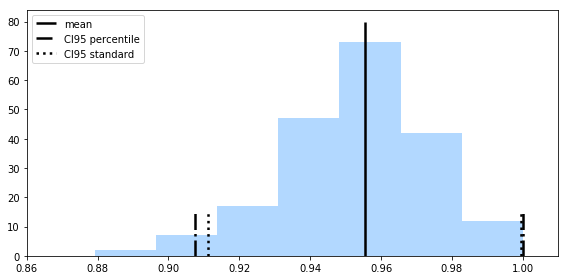

In [17]:
mean = np.mean(accuracies)

#se = np.sqrt( (1. / (100-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
#ci = 1.984 * se

se = np.sqrt( (1. / (200-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
ci = 1.97 * se

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(mean, [0], 80, lw=2.5, linestyle='-', label='mean')
#ax.vlines(med, [0], 60, lw=2.5, linestyle='--', label='median')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label='CI95 standard')
ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')


ax.hist(accuracies, bins=7,
        color='#0080ff', edgecolor="none", 
        alpha=0.3)
plt.legend(loc='upper left')

plt.xlim([0.86, 1.01])
plt.tight_layout()
#plt.savefig('figures/bootstrap-histo-1.svg')

plt.show()

### 5k MNIST Subset

In [18]:
from mlxtend.data import mnist_data
from sklearn.linear_model import LogisticRegression


rng = np.random.RandomState(seed=12345)

X, y = mnist_data()

clf = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=0.000001, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=12, 
                           solver='lbfgs', 
                           max_iter=1000, 
                           multi_class='multinomial', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=1)


idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
    
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    
    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_test_X, boot_test_y = X[test_idx], y[test_idx]
    
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

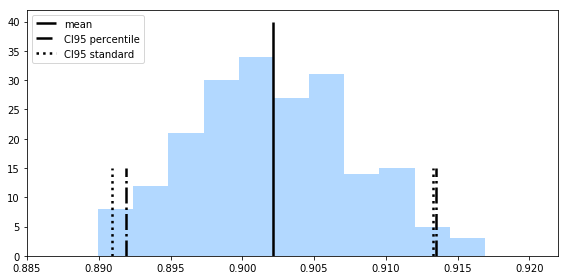

In [19]:
mean = np.mean(accuracies)

#se = np.sqrt( (1. / (100-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
#ci = 1.984 * se

se = np.sqrt( (1. / (200-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
ci = 1.97 * se

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(mean, [0], 40, lw=2.5, linestyle='-', label='mean')
#ax.vlines(med, [0], 60, lw=2.5, linestyle='--', label='median')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label='CI95 standard')
ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')


ax.hist(accuracies, bins=11,
        color='#0080ff', edgecolor="none", 
        alpha=0.3)
plt.legend(loc='upper left')

plt.xlim([0.885, 0.922])
plt.tight_layout()

# plt.savefig('figures/bootstrap-histo-2.svg')

plt.show()

### Out of Bag Bootstrap

In [20]:
from mlxtend.evaluate import BootstrapOutOfBag
import numpy as np


oob = BootstrapOutOfBag(n_splits=3)
for train, test in oob.split(np.array([1, 2, 3, 4, 5])):
    print(train, test)

[1 1 4 1 1] [0 2 3]
[0 1 1 3 0] [2 4]
[3 3 3 3 0] [1 2 4]


In [21]:
from mlxtend.data import iris_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X, y = iris_data()
model = DecisionTreeClassifier()

In [22]:
cv_scores = cross_val_score(model, X, y, cv=5)
print('CV scores', cv_scores)
print('Mean CV score', np.mean(cv_scores))
print('CV score Std', np.std(cv_scores))

CV scores [0.96666667 0.96666667 0.9        1.         1.        ]
Mean CV score 0.9666666666666668
CV score Std 0.036514837167011066


In [23]:
bootstrap_scores = \
    cross_val_score(model, X, y, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=456))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

Bootstrap scores [0.92727273 0.98113208 0.92592593 0.98305085 0.90909091]
Mean Bootstrap score 0.9452944970437775
Score Std 0.030726208804992074


In [24]:
bootstrap_scores = \
    cross_val_score(model, X, y, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=456))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

Mean Bootstrap score 0.9448327329412445
Score Std 0.030836791007487842


In [25]:
lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [87.27, 100.00]


###  .632 Bootstrap

In [26]:
from mlxtend.evaluate import bootstrap_point632_score


bootstrap_scores = bootstrap_point632_score(model, X, y, n_splits=200)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

Mean Bootstrap score 0.9627083103060582
Score Std 0.016892377745312225


In [27]:
lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [92.81, 98.89]
